<a href="https://colab.research.google.com/github/WoogiWooks/Kaggle_ML/blob/main/%EB%B6%84%EB%A5%98_%EA%B3%A0%EA%B0%9D%EB%A7%8C%EC%A1%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/캐글/완벽가이드 예제

/content/drive/MyDrive/캐글/완벽가이드 예제


In [ ]:
!ls

'3장. 평가'  '4장. 분류'   __pycache__	 Score.ipynb   score.py


In [ ]:
from score import *

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
Data = pd.read_csv("/content/drive/MyDrive/캐글/완벽가이드 예제/4장. 분류/santander-customer-satisfaction/train.csv", encoding="latin-1")
X_test = pd.read_csv("/content/drive/MyDrive/캐글/완벽가이드 예제/4장. 분류/santander-customer-satisfaction/test.csv", encoding="latin-1")
y_test = pd.read_csv("/content/drive/MyDrive/캐글/완벽가이드 예제/4장. 분류/santander-customer-satisfaction/sample_submission.csv", encoding="latin-1")
Data

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.00,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,15498.42,0.0,48175.62,31837.02,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
Data.shape

(76020, 371)

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [ ]:
train.isna().sum() 

In [ ]:
y_test.replace("0", 0)

,TARGET
0,0
1,0
2,0
3,0
4,0
...,...
75813,0
75814,0
75815,0
75816,0


In [ ]:
print(Data["TARGET"].value_counts())
Negative = Data["TARGET"].value_counts()[0]
Positive = Data["TARGET"].value_counts()[1]
N_ratio = Negative/(Negative+Positive)
P_ratio = Positive/(Negative+Positive)
print(N_ratio*100)
print(P_ratio*100)

0    73012
1     3008
Name: TARGET, dtype: int64
96.0431465403841
3.9568534596158904


In [ ]:
Data.describe()
# min 값에 -999999는 NaN값을 변환한 것으로 판단됨

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.0,76020.0,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.0,76020.000000,76020.000000,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,68.803937,113.056934,68.205140,113.225058,137.242763,68.618087,113.792410,140.403479,5.477676,0.011458,0.003762,0.0,0.0,0.958024,0.663760,0.000105,0.000026,0.032833,0.028598,0.067522,0.045462,0.052249,0.042936,0.041476,0.010168,0.009997,0.000026,0.000026,0.050855,...,1077.256756,1048.856447,68.275452,9.505287,124.620962,110.026575,3.997023e+03,613.534443,5.703008e+03,4.401002e+03,3639.419939,556.184178,4852.261814,3857.848542,771.227449,162.170439,9.569502e+02,7.509563e+02,0.175324,0.0,0.513023,0.344174,9.117181e+01,3.646318e+01,1.310316e+02,1.092169e+02,0.213071,0.001910,0.253907,0.186630,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,319.605516,512.154823,531.897917,950.086398,697.712596,535.473750,953.578624,712.767240,465.391149,0.106425,0.061221,0.0,0.0,0.200535,0.472425,0.010258,0.005129,0.178202,0.166674,0.250925,0.208316,0.222531,0.202714,0.199390,0.100325,0.099486,0.005129,0.005129,0.219703,...,9614.906985,8189.948852,1733.838226,519.389157,2205.249804,1935.305713,3.777314e+04,9292.752726,4.620254e+04,3.550718e+04,26359.174223,7182

In [ ]:
Data.var3.value_counts()[:10]
# -9999999값이 116개나 존재
# 따라서 가장 많은 값인 2로 변경

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64

In [ ]:
Data["var3"].replace(-999999, 2, inplace=True)
Data.var3.value_counts()[:10]

2     74281
8       138
9       110
3       108
1       105
13       98
7        97
4        86
12       85
6        82
Name: var3, dtype: int64

In [ ]:
# ID 피쳐는 단순 식별 피쳐이므로 제거
Data.drop("ID", axis=1, inplace=True)
X_test.drop("ID", axis=1, inplace=True)
y_test.drop("ID", axis=1, inplace=True)

In [ ]:
X = Data.iloc[:, :-1]
y = Data.iloc[:, -1]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)


In [ ]:
# 불균형한 데이터셋이 트레인/테스트 균일하게 나누어짐 확인
train_count = y_train.count()
valid_count = y_valid.count()
print(y_train.value_counts()/train_count)
print("\n")
print(y_valid.value_counts()/valid_count)

0    0.960438
1    0.039562
Name: TARGET, dtype: float64


0    0.960405
1    0.039595
Name: TARGET, dtype: float64


# **XGBoost**

* 예시
 * https://www.kaggle.com/akshat0007/santander-customer-satisfaction-xgboost

In [ ]:
y_train.value_counts()

0    58410
1     2406
Name: TARGET, dtype: int64

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# XGBoost 하이퍼 파라미터 설정

xgb = XGBClassifier(n_estimators=500, random_state=111)  # learning_rate 설정 가능  # max_depth 설정 가능

xgb.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=[(X_valid, y_valid)])  # eval_metric = 조기중단 위한 평가 지표  # 분류에서는 주로 logloss 이용

pred = xgb.predict(X_test)
pred_proba = xgb.predict_proba(X_test)[:, 1]

[0]	validation_0-auc:0.799553
Will train until validation_0-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.814322
[2]	validation_0-auc:0.81362
[3]	validation_0-auc:0.811428
[4]	validation_0-auc:0.815378
[5]	validation_0-auc:0.809092
[6]	validation_0-auc:0.809166
[7]	validation_0-auc:0.819413
[8]	validation_0-auc:0.815571
[9]	validation_0-auc:0.817842
[10]	validation_0-auc:0.816254
[11]	validation_0-auc:0.819937
[12]	validation_0-auc:0.822836
[13]	validation_0-auc:0.824087
[14]	validation_0-auc:0.82552
[15]	validation_0-auc:0.826361
[16]	validation_0-auc:0.826889
[17]	validation_0-auc:0.826859
[18]	validation_0-auc:0.82771
[19]	validation_0-auc:0.830079
[20]	validation_0-auc:0.831466
[21]	validation_0-auc:0.831656
[22]	validation_0-auc:0.831623
[23]	validation_0-auc:0.832364
[24]	validation_0-auc:0.832592
[25]	validation_0-auc:0.832528
[26]	validation_0-auc:0.833145
[27]	validation_0-auc:0.833153
[28]	validation_0-auc:0.833466
[29]	validation_0-auc:0.833333
[30]	validation_0-

In [ ]:
print(y_test.dtypes)

TARGET    int64
dtype: object


In [ ]:
y_test1 = y_test.values

In [ ]:
pred.dtype

dtype('int64')

In [ ]:
classify_score(y_test, pred)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:546: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_score = check_array(y_score, ensure_2d=False)


ValueError: ignored

In [ ]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1].reshape(-1,1), average="macro")

ValueError: ignored

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# 하이퍼 파라미터 최적화
# 최적화 과정 속도 향상 위해 일단 n_estimator 감소한 뒤 이후에 다시 복구

xgb = XGBClassifier(n_estimators=100)

params = {"max_depth": [5, 7], "min_child_weight":[1, 3], "colsample_bytree":[0.5, 0.75]}

gridcv = GridSearchCV(xgb, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc", eval_set=[(X_valid, y_valid)])

print(gridcv.best_params_)

[0]	validation_0-auc:0.731156
Will train until validation_0-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.808588
[2]	validation_0-auc:0.808431
[3]	validation_0-auc:0.820077
[4]	validation_0-auc:0.829058
[5]	validation_0-auc:0.825952
[6]	validation_0-auc:0.824449
[7]	validation_0-auc:0.829266
[8]	validation_0-auc:0.831913
[9]	validation_0-auc:0.830399
[10]	validation_0-auc:0.832213
[11]	validation_0-auc:0.835639
[12]	validation_0-auc:0.836913
[13]	validation_0-auc:0.835426
[14]	validation_0-auc:0.835472
[15]	validation_0-auc:0.836705
[16]	validation_0-auc:0.838474
[17]	validation_0-auc:0.838996
[18]	validation_0-auc:0.839793
[19]	validation_0-auc:0.839502
[20]	validation_0-auc:0.840358
[21]	validation_0-auc:0.840124
[22]	validation_0-auc:0.839376
[23]	validation_0-auc:0.840503
[24]	validation_0-auc:0.840156
[25]	validation_0-auc:0.840192
[26]	validation_0-auc:0.840873
[27]	validation_0-auc:0.841356
[28]	validation_0-auc:0.842265
[29]	validation_0-auc:0.842124
[30]	validation_

In [ ]:
score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1].reshape(-1,1), average="macro")

ValueError: ignored

In [ ]:
# best_params 고정 후 추가 하이퍼 파라미터 진행
xgb = XGBClassifier(n_estimators=1000, random_state=111, learning_rate=0.02, max_depth=5, min_child_weight=1, colsample_bytree=0.5, reg_alpha=0.03)

xgb.fit(X_train, y_train, early_stopping_rounds=200, eval_metric="auc", eval_set=[(X_valid, y_valid)])

[0]	validation_0-auc:0.73226
Will train until validation_0-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.740882
[2]	validation_0-auc:0.796173
[3]	validation_0-auc:0.808482
[4]	validation_0-auc:0.803892
[5]	validation_0-auc:0.805476
[6]	validation_0-auc:0.804083
[7]	validation_0-auc:0.810048
[8]	validation_0-auc:0.814419
[9]	validation_0-auc:0.815455
[10]	validation_0-auc:0.814864
[11]	validation_0-auc:0.819234
[12]	validation_0-auc:0.818335
[13]	validation_0-auc:0.817307
[14]	validation_0-auc:0.816778
[15]	validation_0-auc:0.817567
[16]	validation_0-auc:0.82104
[17]	validation_0-auc:0.82283
[18]	validation_0-auc:0.822491
[19]	validation_0-auc:0.822162
[20]	validation_0-auc:0.823233
[21]	validation_0-auc:0.825217
[22]	validation_0-auc:0.826575
[23]	validation_0-auc:0.826079
[24]	validation_0-auc:0.827151
[25]	validation_0-auc:0.828977
[26]	validation_0-auc:0.827567
[27]	validation_0-auc:0.828269
[28]	validation_0-auc:0.828821
[29]	validation_0-auc:0.829618
[30]	validation_0-

XGBClassifier(colsample_bytree=0.5, learning_rate=0.02, max_depth=5,
              n_estimators=1000, random_state=111, reg_alpha=0.03)

In [ ]:
score = roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1].reshape(-1,1), average="macro")

ValueError: ignored

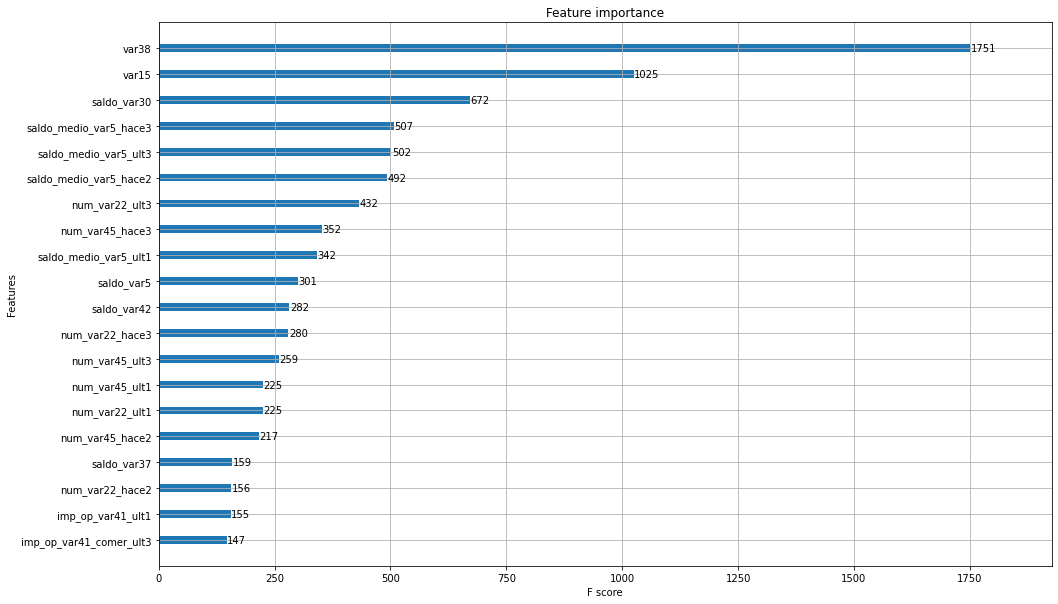

In [ ]:
# 모델에서의 각 피쳐별 중요도
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(16, 10))
plot_importance(xgb, ax=ax, max_num_features=20, height=0.3)

# **LightGBM**